In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_global = pd.read_csv('owid-covid-data.csv',usecols=['location','date','total_cases','total_deaths','total_tests','positive_rate','people_fully_vaccinated','population']);
#df_global = pd.read_csv('owid-covid-data.csv');

# country_name = 'United Kingdom';
country_name = 'Sri Lanka';
# country_name = 'India'
df_country = df_global[df_global['location'] == country_name].reset_index();
#df_country.reset_index(inplace=True);

#Fix NaNs produced from empty lines
for col in ['total_cases','total_deaths','total_tests','positive_rate','people_fully_vaccinated']:
    if (np.isnan(df_country[col][0])):
        df_country.loc[0,col] = 0;
    df_country[col].fillna(method='ffill', inplace=True);

#Uncomment block below to remove data before a given start date
# start_index = df_country.index[df_country['date'] == '2020-10-01']
# print('Start index:', start_index[0])
# df_country = df_country.loc[start_index[0]::]
# df_country.reset_index(drop=True, inplace=True);

#Uncomment block below to remove data after a given end date
# end_index = df_country.index[df_country['date'] == '2022-02-28']
# print('End index:', end_index[0])
# df_country = df_country.loc[0:end_index[0]]
# df_country.reset_index(drop=True, inplace=True);

df_country['total_recovered'] = 0;

for col in ['total_cases','total_deaths','total_tests','people_fully_vaccinated','population']:
    df_country[col] = pd.to_numeric(df_country[col], downcast="integer");


print(df_country)

       index   location        date  total_cases  total_deaths  total_tests  \
0     205204  Sri Lanka  2020-01-27            1             0            0   
1     205205  Sri Lanka  2020-01-28            1             0            0   
2     205206  Sri Lanka  2020-01-29            1             0            0   
3     205207  Sri Lanka  2020-01-30            1             0            0   
4     205208  Sri Lanka  2020-01-31            1             0            0   
...      ...        ...         ...          ...           ...          ...   
1047  206251  Sri Lanka  2022-12-09       671745         16808      7691045   
1048  206252  Sri Lanka  2022-12-10       671752         16808      7691045   
1049  206253  Sri Lanka  2022-12-11       671756         16808      7691045   
1050  206254  Sri Lanka  2022-12-12       671761         16808      7691045   
1051  206255  Sri Lanka  2022-12-13       671770         16809      7691045   

      positive_rate  people_fully_vaccinated  popul

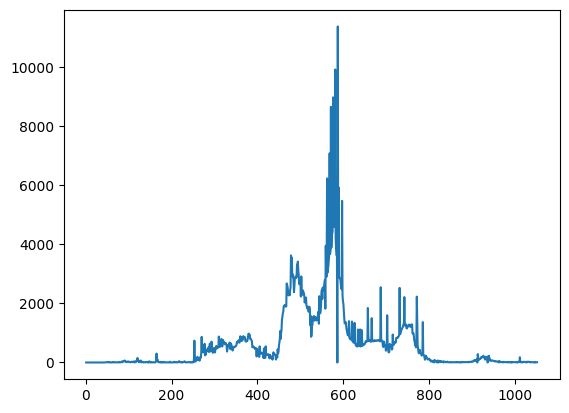

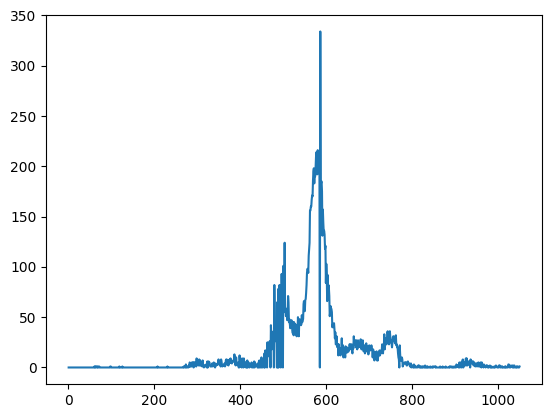

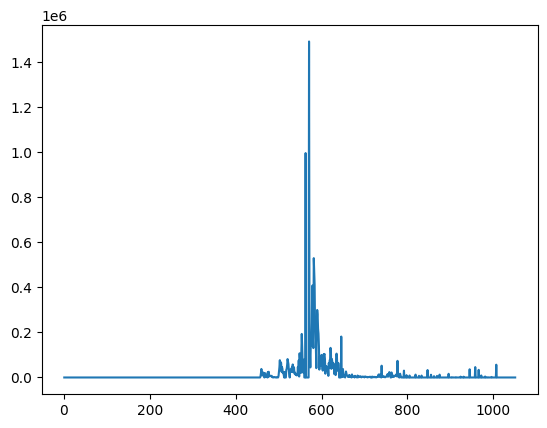

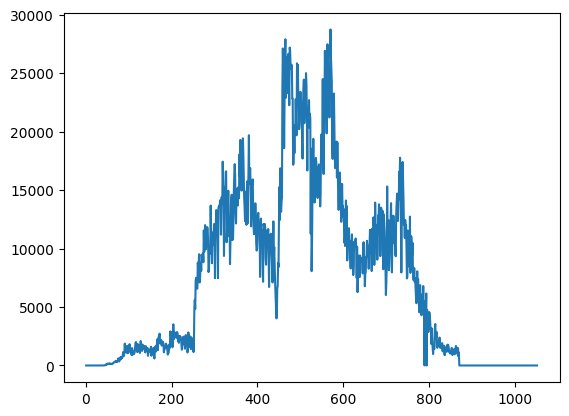

21832150

In [4]:
plt.plot(df_country['total_cases'].diff())
plt.show()

plt.plot(df_country['total_deaths'].diff())
plt.show()

plt.plot(df_country['people_fully_vaccinated'].diff())
plt.show()

plt.plot(df_country['total_tests'].diff())
plt.show()

df_country['population'][0]

In [5]:
popN = df_country['population'][0];
country_str = country_name.lower().replace(" ", "");
f = open("csv_data/" + country_str + ".txt", "w")
f.write(str(popN) + "\n")
f.close()

df_country.to_csv('csv_data/' + country_str + '.txt', mode='a', header=False, index=False, \
                  columns=['total_cases', 'total_recovered', 'total_deaths'], sep=' ')

df_country.to_csv('csv_data/' + country_str + '_vaccinations.txt', mode='w', header=False, index=False, \
                  columns=['people_fully_vaccinated'], sep=' ')

df_country.to_csv('csv_data/' + country_str + '_testing.txt', mode='w', header=False, index=False, \
                  columns=['total_tests'], sep=' ')

In [5]:
date_vec = ['2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01', '2022-01-01'];

IFR_index_vec = [];
for date in date_vec:
    ifr_index = df_country.index[df_country['date'] == date];
    if len(ifr_index) == 0:
        IFR_index_vec.append(0);
    else:
        IFR_index_vec.append(ifr_index[0]);
print(IFR_index_vec);

# IFR_index1 = df_country.index[df_country['date'] == '2020-06-01']
# IFR_index2 = df_country.index[df_country['date'] == '2021-01-01']
# IFR_index3 = df_country.index[df_country['date'] == '2021-04-01']
# IFR_index4 = df_country.index[df_country['date'] == '2021-12-01']
# print(IFR_index1)
# print(IFR_index2)
# print(IFR_index3)
# print(IFR_index4)

[65, 156, 248, 340, 430, 521, 613, 705]


In [19]:
countries = ['Sri Lanka','United States','India','United Kingdom'];

f = open('world_vaccine_data.js', 'w')
f.write('let world_vaccine_data = {\n');

for country_name in countries:
    df_country = df_global[df_global['location'] == country_name].reset_index();

    #Fix NaNs produced from empty lines
    for col in ['people_fully_vaccinated']:
        if (np.isnan(df_country[col][0])):
            df_country.loc[0,col] = 0;
        df_country[col].fillna(method='ffill', inplace=True);
        df_country[col] = pd.to_numeric(df_country[col], downcast="integer");

    if (country_name == 'United States'):
        country_name = 'US';
        
    f.write('"' + country_name + '": [\n')
    
    for row in range(0,len(df_country)):
        f.write("  {'t': '" + df_country['date'][row] + "', 'dose2': " + 
                       str(df_country['people_fully_vaccinated'][row]) + "},\n")
    
    f.write('],\n')
f.write('}\n')
f.close();